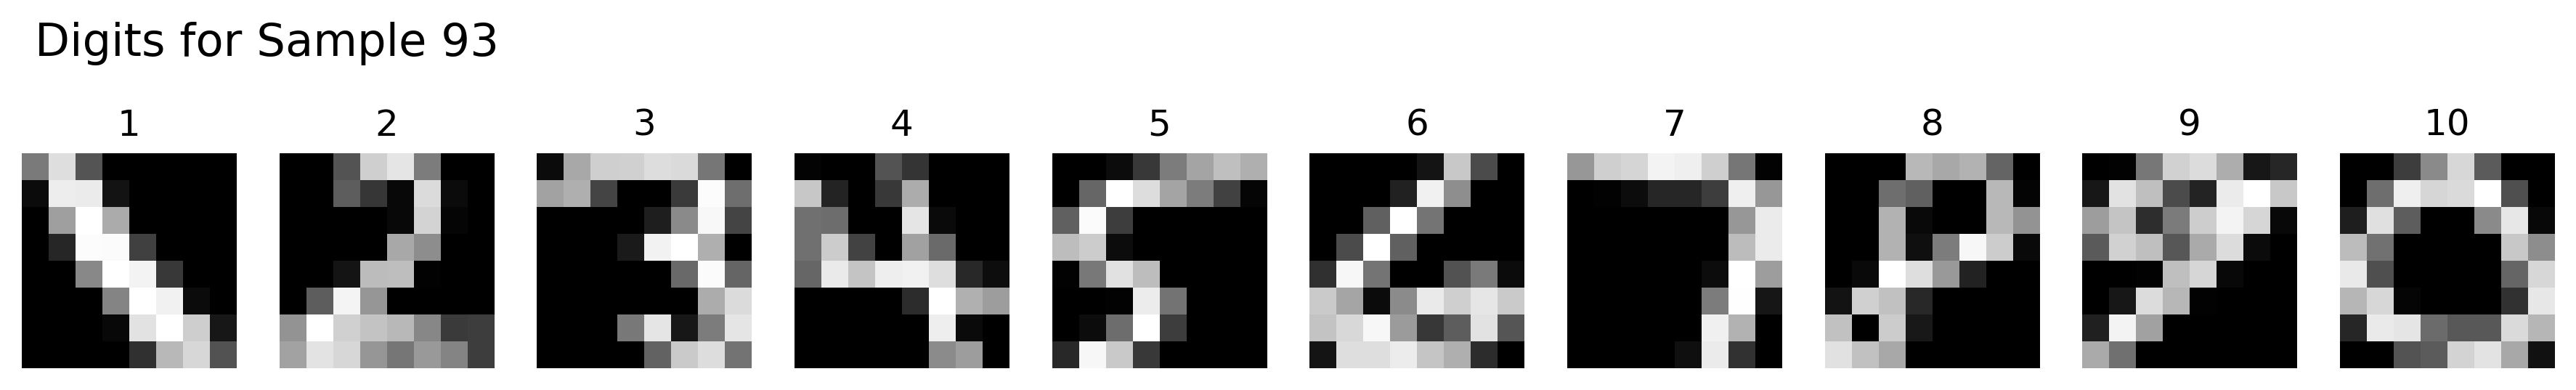

In [16]:
import scipy.io as sio
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data
X = sio.loadmat('a1digits.mat')['digits_train'] # Training data
Y = sio.loadmat('a1digits.mat')['digits_test'] # Testing data

# Get information on the training and test set sizes
    # m - size of each image vector (64 features)
    # n - number of samples
    # k - number of digits per sample (10 digits)

m, n, k = X.shape
m2, n2, k2 = Y.shape

# Plot a random sample
num = random.randint(0,n-1)
fig, axes = plt.subplots(1, k,figsize=(15,2.3),dpi=300)
fig.suptitle('Digits for Sample %i' %num, size=15, x=0.2)

for i in range(0, k):
    axes[i].imshow(np.reshape(X[:,num,i],[8,8]), cmap='Greys_r')
    axes[i].axis('off')
    axes[i].set_title(str(i+1))

# If desired, normalize each digit

def normalizer(X):
    """Normalize the features for each digit vector between 0 and 1"""
    m, n, k = X.shape # Understand the dimensions of the sample
    for i in range(0, k):
        for j in range(0,n):
            max_m = np.max(X[:,j,i])
            min_m = np.min(X[:,j,i])
            X[:,j,i] = np.divide((np.subtract(X[:,j,i],min_m)),(max_m-min_m))
    return X

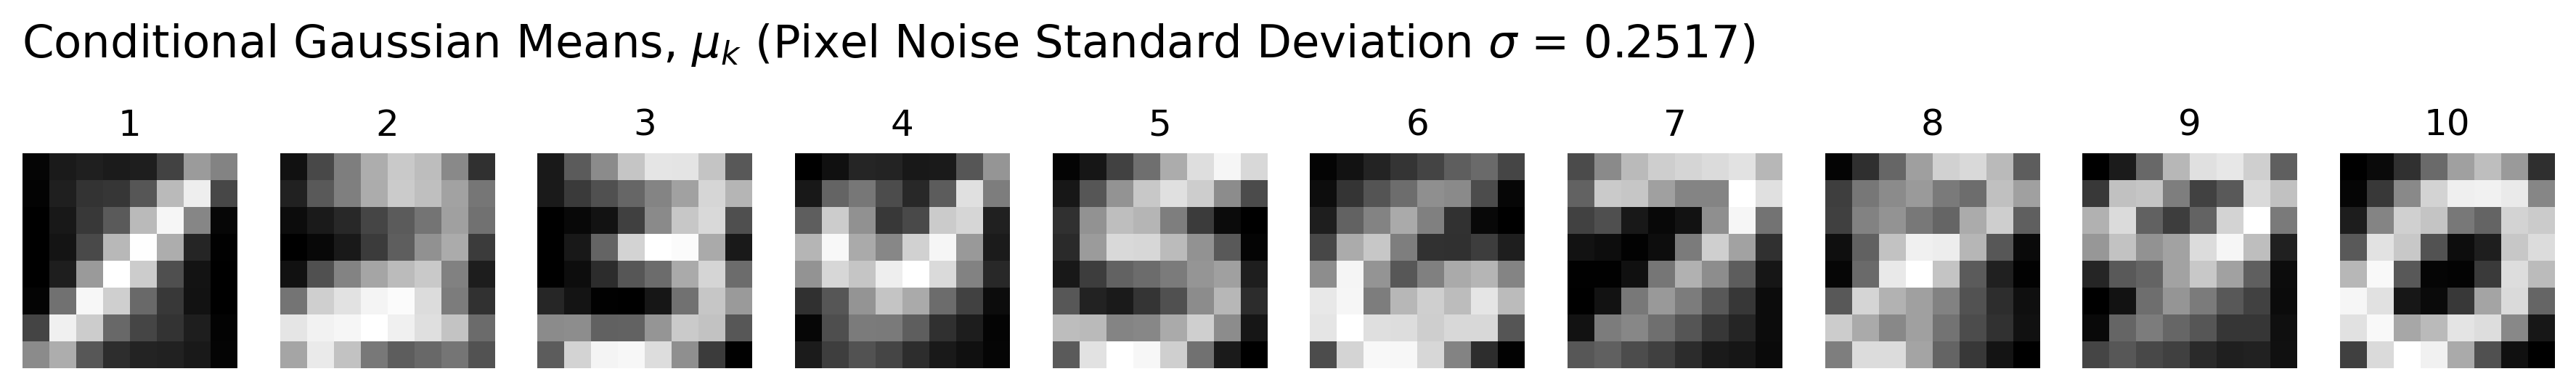

In [17]:
# Calculate the means
mu = np.mean(X,axis=1)

sigma2 =[]  # initialize the variance to zero

# Iterate through all the digits and samples to find the variance
for i in range(0,k):
    for j in range(0,n):
        s = np.sum(np.sum(np.square(X[:,j,i] - mu[:,i])))
        sigma2.append(s.tolist())

sigma2 = sum(sigma2)/(64*7000) # Variance
sigma = math.sqrt(sigma2) # Pixel noise standard deviation



# Plot the means
fig, axes = plt.subplots(1, k,figsize=(15,2.3),dpi=300)
fig.suptitle('Conditional Gaussian Means, ' r'$\mu_{k}$' 
             ' (Pixel Noise Standard Deviation ' r'$\sigma$' ' = %0.4f)' %sigma, size=15, x=0.39)

for i in range(0, k):
    axes[i].imshow(np.reshape(mu[:,i],[8,8]), cmap='Greys_r')
    axes[i].axis('off')
    axes[i].set_title(str(i+1))

The predicted digit is: 6
The actual digit is: 10


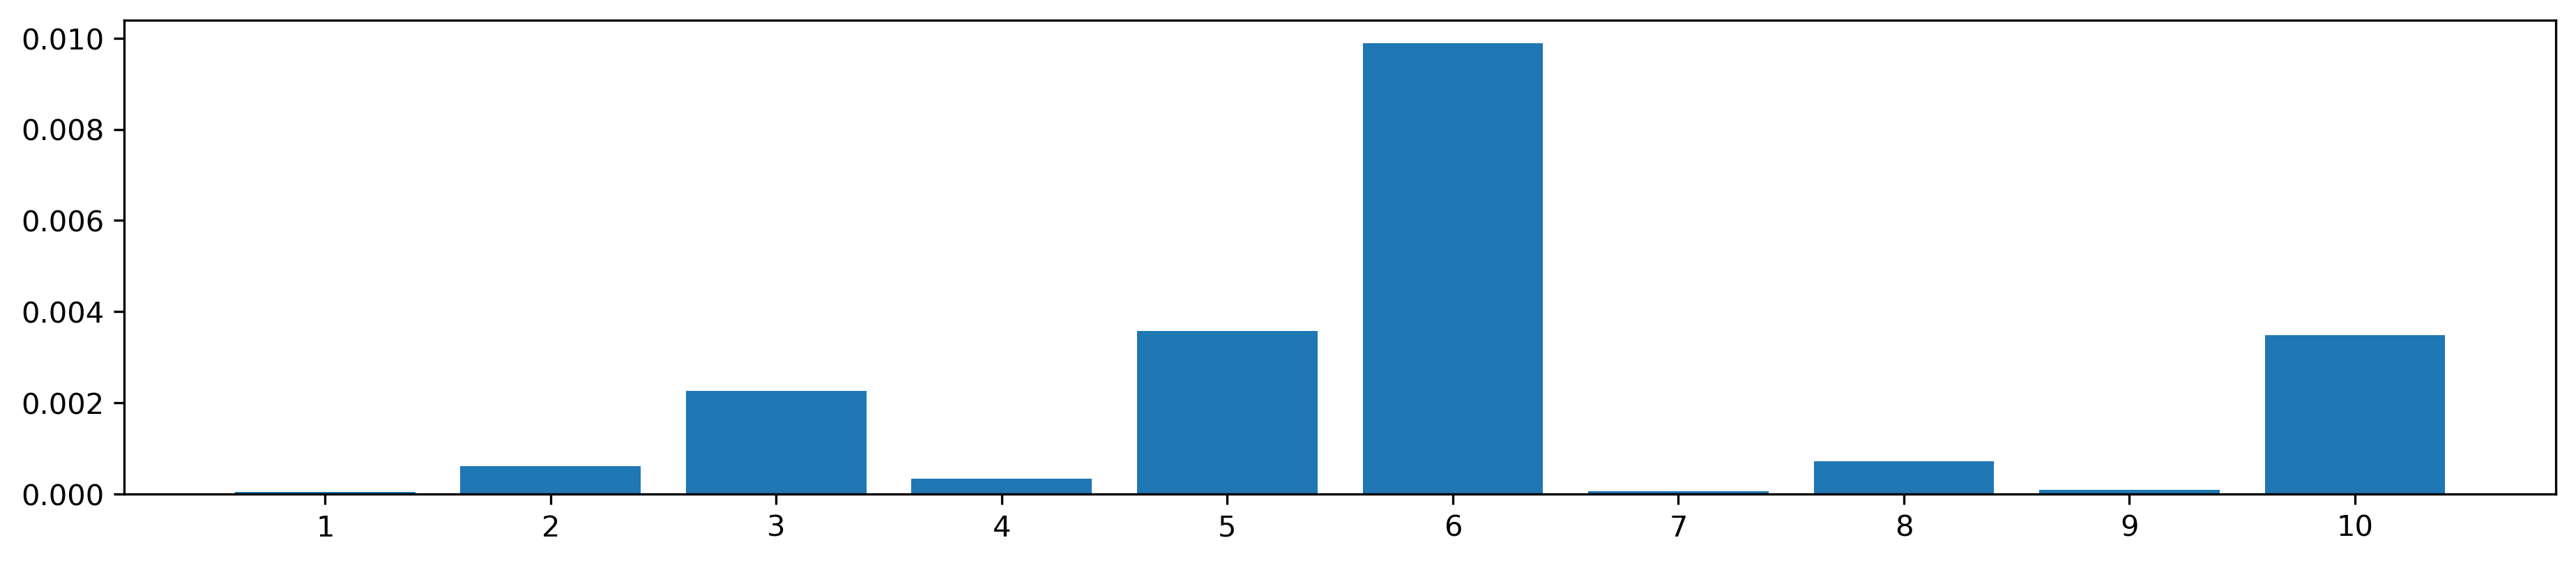

In [3]:
# Simple function to estimate the posterior probabilities
f = lambda x, mu : (math.exp(-np.sum(np.square(x-mu))))

# Test to see how this classifies a digit
l = []
max_index = 0
digit_index = 9 # Select digit 10, a zero
for i in range(0,10):
    y = f(Y[:,300,digit_index],mu[:,i])
    l.append(y)

# Plot the results
max_index = 1 + l.index(max(l))
print('The predicted digit is:',max_index)
print('The actual digit is:', digit_index+1)
fig, axes = plt.subplots(1, 1,figsize=(15,3),dpi=300)
    
plt.xticks(np.arange(1, 11, step=1))
axes.bar(range(1,11),l)
plt.show()

In [4]:
# WITHOUT THE CLASSIFIER COLUMN
class_count = [] 
m2, n2, k2 = Y.shape # Load the test data

# Iterate through all the samples in our test data-set to calculate the error rate
for h in range(0,k2):
    c = [0]*10
    for x in range(0,n2):
        l = []
   
        for i in range(0,k2):
            y = f(Y[:,x-1,h],mu[:,i])
            l.append(y)
            
        max_index = l.index(max(l))
        c[max_index] = c[max_index] + 1
    
    error_count = n2 - c[h] # Calculate the number of errors for this class
    error_per = (n2-c[h])/n2 # Calculate error percentage
    c.extend([error_count, error_per]) 
    class_count.append(c)
class_count

[[331, 9, 3, 10, 11, 3, 6, 27, 0, 0, 69, 0.1725],
 [5, 319, 7, 3, 8, 31, 4, 17, 1, 5, 81, 0.2025],
 [1, 10, 337, 0, 29, 4, 7, 4, 3, 5, 63, 0.1575],
 [29, 0, 0, 339, 2, 7, 0, 3, 19, 1, 61, 0.1525],
 [3, 1, 45, 4, 332, 1, 4, 6, 1, 3, 68, 0.17],
 [19, 7, 3, 9, 1, 356, 0, 2, 0, 3, 44, 0.11],
 [40, 1, 0, 4, 0, 0, 337, 3, 14, 1, 63, 0.1575],
 [29, 0, 23, 6, 17, 1, 2, 291, 28, 3, 109, 0.2725],
 [38, 2, 1, 19, 0, 0, 39, 11, 290, 0, 110, 0.275],
 [4, 7, 3, 0, 11, 16, 1, 11, 0, 347, 53, 0.1325]]

In [5]:
# Create a confusion matrix showing the number of misclassified digits per class
c = [1,2,3,4,5,6,7,8,9,10,'Error Count','Error %']
r = np.array(['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'])
pred = pd.DataFrame(class_count,columns=c,index=r)
pred.index.name = "Class"
pred['Error %'] = pd.Series(["{0:.1f}%".format(val * 100) for val in pred['Error %']], index = pred.index)


# Create a seperate table to just show the error count and total error rate
g_ec = np.array(class_count)
g_ec = g_ec[:,10]
g_ec = np.append(g_ec,(np.mean(g_ec)/400))
label = np.array(['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','Total Error Rate'])
g_ec = pd.DataFrame(g_ec,index=label,columns=['Gaussian']).T
g_ec['Total Error Rate'] = pd.Series(["{0:.1f}%".format(val * 100) for val in g_ec['Total Error Rate']], index = g_ec.index)
g_ec[label[:-1]] = g_ec[label[:-1]].applymap(np.int64)
pred

,1,2,3,4,5,6,7,8,9,10,Error Count,Error %
Class,,,,,,,,,,,,
C1,331,9,3,10,11,3,6,27,0,0,69,17.2%
C2,5,319,7,3,8,31,4,17,1,5,81,20.2%
C3,1,10,337,0,29,4,7,4,3,5,63,15.8%
C4,29,0,0,339,2,7,0,3,19,1,61,15.2%
C5,3,1,45,4,332,1,4,6,1,3,68,17.0%
C6,19,7,3,9,1,356,0,2,0,3,44,11.0%
C7,40,1,0,4,0,0,337,3,14,1,63,15.8%
C8,29,0,23,6,17,1,2,291,28,3,109,27.3%
C9,38,2,1,19,0,0,39,11,290,0,110,27.5%


In [6]:
# Create a table showing just the total number of errors
error_table = np.array(class_count)[:,10:12]
error_table = np.append(error_table,[error_table.mean(axis=0)],0)
c = ['Error Count','Error %']
r = np.array(['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','Avg Errors'])
ge = pd.DataFrame(error_table,columns=c,index=r)
ge['Error %'] = pd.Series(["{0:.1f}%".format(val * 100) for val in ge['Error %']], index = ge.index)
ge

,Error Count,Error %
C1,69.0,17.2%
C2,81.0,20.2%
C3,63.0,15.8%
C4,61.0,15.2%
C5,68.0,17.0%
C6,44.0,11.0%
C7,63.0,15.8%
C8,109.0,27.3%
C9,110.0,27.5%
C10,53.0,13.2%


In [7]:
#NAIVE BAYES

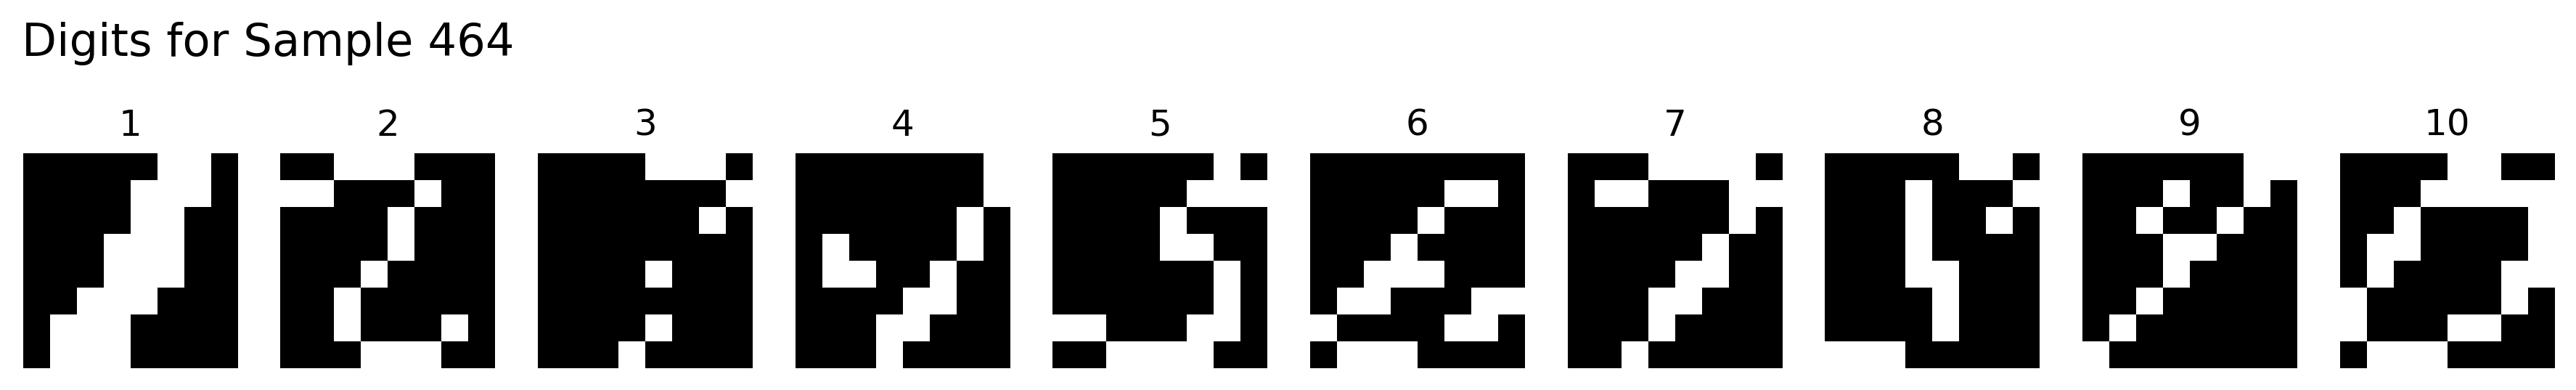

In [18]:

# Load the data
X = sio.loadmat('a1digits.mat')['digits_train'] # Training data
Y = sio.loadmat('a1digits.mat')['digits_test'] # Testing data

# Normalize each digit
def normalizer(X):
    """Normalize the features for each digit vector between 0 and 1"""
    m, n, k = X.shape # Understand the dimensions of the sample
    for i in range(0, k):
        for j in range(0,n):
            max_m = np.max(X[:,j,i])
            min_m = np.min(X[:,j,i])
            X[:,j,i] = np.divide((np.subtract(X[:,j,i],min_m)),(max_m-min_m))
    return X

# X = normalizer(X)
# Y = normalizer(Y)

# Represent each "pixel" in vector in terms of 1 or 0. Binarize data
X = np.where(X > 0.5, 1, 0)
Y = np.where(Y > 0.5, 1, 0)

m, n, k = X.shape

# Plot a random sample
num = random.randint(0,n-1)
fig, axes = plt.subplots(1, k,figsize=(15,2.3),dpi=300)
fig.suptitle('Digits for Sample %i' %num, size=15, x=0.2)

for i in range(0, k):
    axes[i].imshow(np.reshape(X[:,num,i],[8,8]), cmap='Greys_r')
    axes[i].axis('off')
    axes[i].set_title(str(i+1))

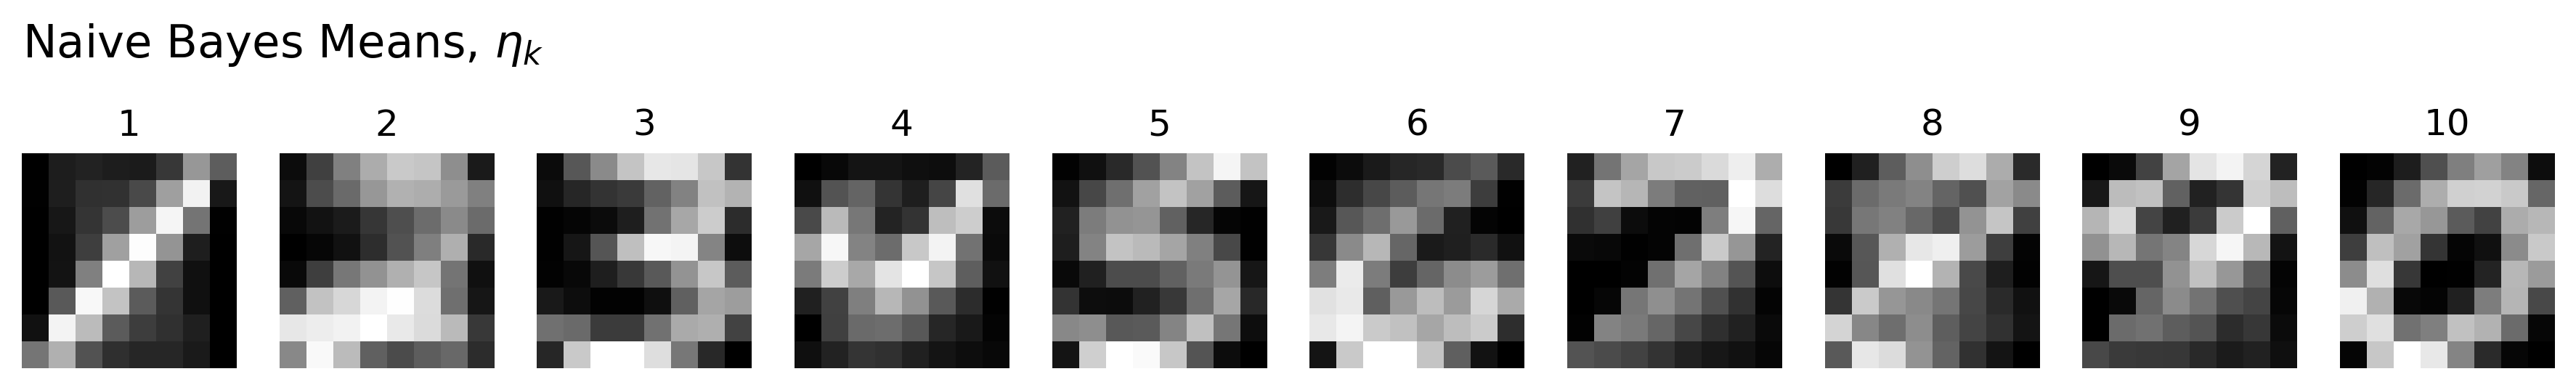

In [19]:
# Calculate the Eta's, which is the mean of all the samples, for that class
eta = np.mean(X,axis=1)

# Visualize the Eta's
fig, axes = plt.subplots(1, k,figsize=(15,2.3),dpi=300)
fig.suptitle('Naive Bayes Means, ' r'$\eta_{k}$', size=15, x=0.205)

for i in range(0, k):
    axes[i].imshow(np.reshape(eta[:,i],[8,8]), cmap='Greys_r')
    axes[i].axis('off')
    axes[i].set_title(str(i+1))

In [10]:
len(Y[:,151,9])

64

In [20]:
test = np.zeros( (5, 64), dtype=np.int32 )
def naive_bayes(eta, x):
    '''Function to classify our digits'''
    y = 1
    m = len(x)
    for i in range(0,m):
        y = y*eta[i]**(x[i])*(1-eta[i])**(1-x[i]) 
        test[0,i] = eta[i]
        test[1,i] = (x[i])
        test[2,i] = (1-eta[i])
        test[3,i] = (1-(x[i]))
        test[4,i] = y
#     print(test)    
    return y    

l = []
max_index = 0
digit_index = 0

for i in range(0,10):
    y = naive_bayes(eta[:,i], Y[:,151,digit_index])
#     print(y)
    l.append(y)
l
# max_index = 1 + l.index(max(l))
# print(l)
# print('The predicted digit is:',max_index)
# print('The actual digit is:', digit_index+1)
# fig, axes = plt.subplots(1, 1,figsize=(15,3),dpi=300)
    
# plt.xticks(np.arange(1, 11, step=1))
# axes.bar(range(1,11),l)
# plt.show()

[2.2570682880106806e-12,
 1.1986164453867805e-18,
 1.7043850852531622e-22,
 1.1125500131421006e-19,
 1.3606661318013279e-21,
 5.574539949435446e-22,
 3.638942042836809e-26,
 3.7058468437824656e-14,
 1.1718583614087828e-21,
 6.935462849409904e-25]

In [21]:
def nb_test(eta, Y):
    '''Naive Bayes classifier, for use when you have already gone through training; that is,
    you've calculated the eta already. Outputs a pandas data-frame for a confusion matrix, nb1;
    a df of error count per digit, nb2; and a simple df with total error rate, n3.'''
    
    class_count = [] # Blank list to put the predictions in
    m2, n2, k2 = Y.shape # Determine the shape of the test data
    
    # Iterate through all samples to predict which class (digit) they should belong to
    for h in range(0,k2):
        c = [0]*10
        for x in range(0,n2):
            l = []
            for i in range(0,k2):
                y = naive_bayes(eta[:,i], Y[:,x-1,h])
                l.append(y)
            max_index = l.index(max(l))
            c[max_index] = c[max_index] + 1

        error_count = n2 - c[h] # Calculate the number of errors for this class
        error_per = (n2-c[h])/n2 # Calculate error percentage
        c.extend([error_count, error_per]) 
        class_count.append(c)

    # Create a confusion matrix showin the number of misclassified digits per class
    c = [1,2,3,4,5,6,7,8,9,10,'Error Count','Error %']
    r = np.array(['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10'])
    nb1 = pd.DataFrame(class_count,columns=c,index=r)
    nb1.index.name = "Class"
    nb1['Error %'] = pd.Series(["{0:.1f}%".format(val * 100) for val in nb1['Error %']], index = nb1.index)

    # Create a table showing the total number of errors
    error_table = np.array(class_count)[:,10:12]
    error_table = np.append(error_table,[error_table.mean(axis=0)],0)
    c = ['Error Count','Error %']
    r = np.array(['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','Avg Errors'])
    nb2 = pd.DataFrame(error_table,columns=c,index=r)
    nb2['Error %'] = pd.Series(["{0:.1f}%".format(val * 100) for val in nb2['Error %']], index = nb2.index)
    
    # Create a seperate table to just show the error count and total error rate
    nb3 = np.array(class_count)
    nb3 = nb3[:,10]
    nb3 = np.append(nb3,(np.mean(nb3)/400))
    label = np.array(['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','Total Error Rate'])
    nb3 = pd.DataFrame(nb3,index=label,columns=['Naive Bayes']).T
    nb3['Total Error Rate'] = pd.Series(["{0:.1f}%".format(val * 100) for val in nb3['Total Error Rate']], index = nb3.index)
    nb3[label[:-1]] = nb3[label[:-1]].applymap(np.int64)  
    return (nb1, nb2, nb3) # Return the confusion matrix and error table

In [22]:
nb1, nb2, nb3 = nb_test(eta, Y)
nb1

,1,2,3,4,5,6,7,8,9,10,Error Count,Error %
Class,,,,,,,,,,,,
C1,313,12,1,13,9,4,12,36,0,0,87,21.8%
C2,8,296,9,9,7,20,17,24,3,7,104,26.0%
C3,0,21,309,11,25,3,16,8,3,4,91,22.8%
C4,27,0,0,315,4,6,5,5,34,4,85,21.2%
C5,5,5,44,15,289,4,11,17,5,5,111,27.8%
C6,17,5,2,13,9,340,1,3,0,10,60,15.0%
C7,57,1,6,9,0,0,311,1,13,2,89,22.2%
C8,28,5,11,19,18,4,5,279,28,3,121,30.2%
C9,34,0,5,34,4,1,45,9,267,1,133,33.2%
